<h2>Tuotantolinjan simulointi</h2>

Tuotteet saapuvat käsiteltäviksi 2 minuutin välein. Saapumisen yhteydessä tuotteet tarkistetaan ja 
virheelliset hylätään ennen käsittelyn alkamista.

Jos käsittelypiste on varattu, niin tuote jää jonoon odottamaan kunnes käsittelypiste vapautuu. Käsittelyn kesto on 3 minuuttia. 

Simulointimallin avulla voidaan tutkia muodostuuko käsittelypisteestä pullonkaula. Koska 
tuotteiden saapumisväli (2 minuuttia) ja käsittelyaika (3 minuuttia) ovat vakioita, niin ainoa 
kiinnostuksen kohde on hylättävien osuus käsittelypisteeseen saapuvista tuotteista. Seuraavassa simuloidaan käsittelyn kestoaikoja eri hylkäysprosenteilla.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TUOTTEIDEN_VÄLI = 2 #minuuttia
KÄSITTELY_AIKA = 3 #minuuttia
TOISTOJA = 10000

In [3]:
for hylkäys_prosentti in range(40, 50, 2):
    
    tuotanto_linja = pd.DataFrame(index = range(0, TOISTOJA))
    
    tuotanto_linja['aika'] = tuotanto_linja.index * TUOTTEIDEN_VÄLI #tuotteen saapumisaika
    
    tuotanto_linja['hylätty'] = np.random.binomial(1, hylkäys_prosentti/100, size=TOISTOJA)
    
    tuotanto_linja.drop(tuotanto_linja.index[tuotanto_linja['hylätty'] == 1], inplace = True) #poistetaan hylättyjen tuotteiden rivit
    tuotanto_linja.reset_index(drop=True, inplace=True) #indeksin resetointi 0, 1, 2, ...
    
    tuotanto_linja['valmis'] = tuotanto_linja['aika'] + KÄSITTELY_AIKA #käsittelyn valmistumisaika ilman jonoa
    
    #Seuraava for-silmukka lisää jonotusajan valmistumisaikaan
    #Tämän for-silmukan takia simulointi on hidas!
    for i in range(1, len(tuotanto_linja)):
        if (tuotanto_linja.loc[i, 'aika'] < tuotanto_linja.loc[i-1, 'valmis']):
            tuotanto_linja.loc[i, 'valmis'] += tuotanto_linja.loc[i-1,'valmis'] - tuotanto_linja.loc[i, 'aika']
    
    tuotanto_linja['kesto'] = tuotanto_linja['valmis'] - tuotanto_linja['aika']
    
    #Tunnuslukuja kokonaiskestosta (jonotusaika + käsittelyaika) eri hylkäysprosenteilla
    print('Hylkäysprosentti', hylkäys_prosentti)
    print(tuotanto_linja['kesto'].describe())

Hylkäysprosentti 40
count    5986.000000
mean        7.695122
std         5.853069
min         3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        49.000000
Name: kesto, dtype: float64
Hylkäysprosentti 42
count    5841.000000
mean        6.389146
std         3.527205
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max        23.000000
Name: kesto, dtype: float64
Hylkäysprosentti 44
count    5597.000000
mean        5.736466
std         3.045529
min         3.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        22.000000
Name: kesto, dtype: float64
Hylkäysprosentti 46
count    5414.000000
mean        5.173255
std         2.445545
min         3.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        21.000000
Name: kesto, dtype: float64
Hylkäysprosentti 48
count    5245.000000
mean        4.839657
std         2.310068
min         3.000000
25%         3.000000
50%        

Hylkäysprosentti 33
count    6748.000000
mean      177.049348
std       127.649620
min         3.000000
25%        32.000000
50%       165.000000
75%       315.000000
max       375.000000
Name: kesto, dtype: float64


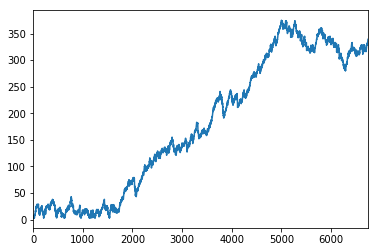

In [6]:
#Keston viivakaaviosta nähdään ovatko jonot tilapäisiä vai kasvavatko jonot ajan kuluessa

hylkäys_prosentti = 33

tuotanto_linja = pd.DataFrame(index = range(0, TOISTOJA))
    
tuotanto_linja['aika'] = tuotanto_linja.index * TUOTTEIDEN_VÄLI #tuotteen saapumisaika
    
tuotanto_linja['hylätty'] = np.random.binomial(1, hylkäys_prosentti/100, size=TOISTOJA)
    
tuotanto_linja.drop(tuotanto_linja.index[tuotanto_linja['hylätty'] == 1], inplace = True) #poistetaan hylättyjen tuotteiden rivit
tuotanto_linja.reset_index(drop=True, inplace=True) #indeksin resetointi 0, 1, 2, ...
    
tuotanto_linja['valmis'] = tuotanto_linja['aika'] + KÄSITTELY_AIKA #käsittelyn valmistumisaika ilman jonoa
    
#Seuraava for-silmukka lisää jonotusajan valmistumisaikaan
#Tämän for-silmukan takia simulointi on hidas!
for i in range(1, len(tuotanto_linja)):
    if (tuotanto_linja.loc[i, 'aika'] < tuotanto_linja.loc[i-1, 'valmis']):
        tuotanto_linja.loc[i, 'valmis'] += tuotanto_linja.loc[i-1,'valmis'] - tuotanto_linja.loc[i, 'aika']
    
tuotanto_linja['kesto'] = tuotanto_linja['valmis'] - tuotanto_linja['aika']
    
print('Hylkäysprosentti', hylkäys_prosentti)
print(tuotanto_linja['kesto'].describe())
tuotanto_linja['kesto'].plot()